<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
    5.1. [Train-test split](#train_test_split)<br>
    5.2. [Fit a model to the data](#fit_model)<br>
    5.3. [Model evaluation](#model_evaluation)<br>
    5.4. [Fix problems](#fix_problems)
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest) -
      [Overfit](#overfit) - 
      [Underfit](#underfit)<br>
    7.3. [Gradient boosting](#gradient_boosting)<br>
    7.4. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>
    8.1. [Find best parameters](#find_best_parameters)<br>
    Bonus: [Classification](#classification)

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [3]:
taxi_jan_2019 = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])

In [4]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [6]:
taxi_data = taxi_data[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [7]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

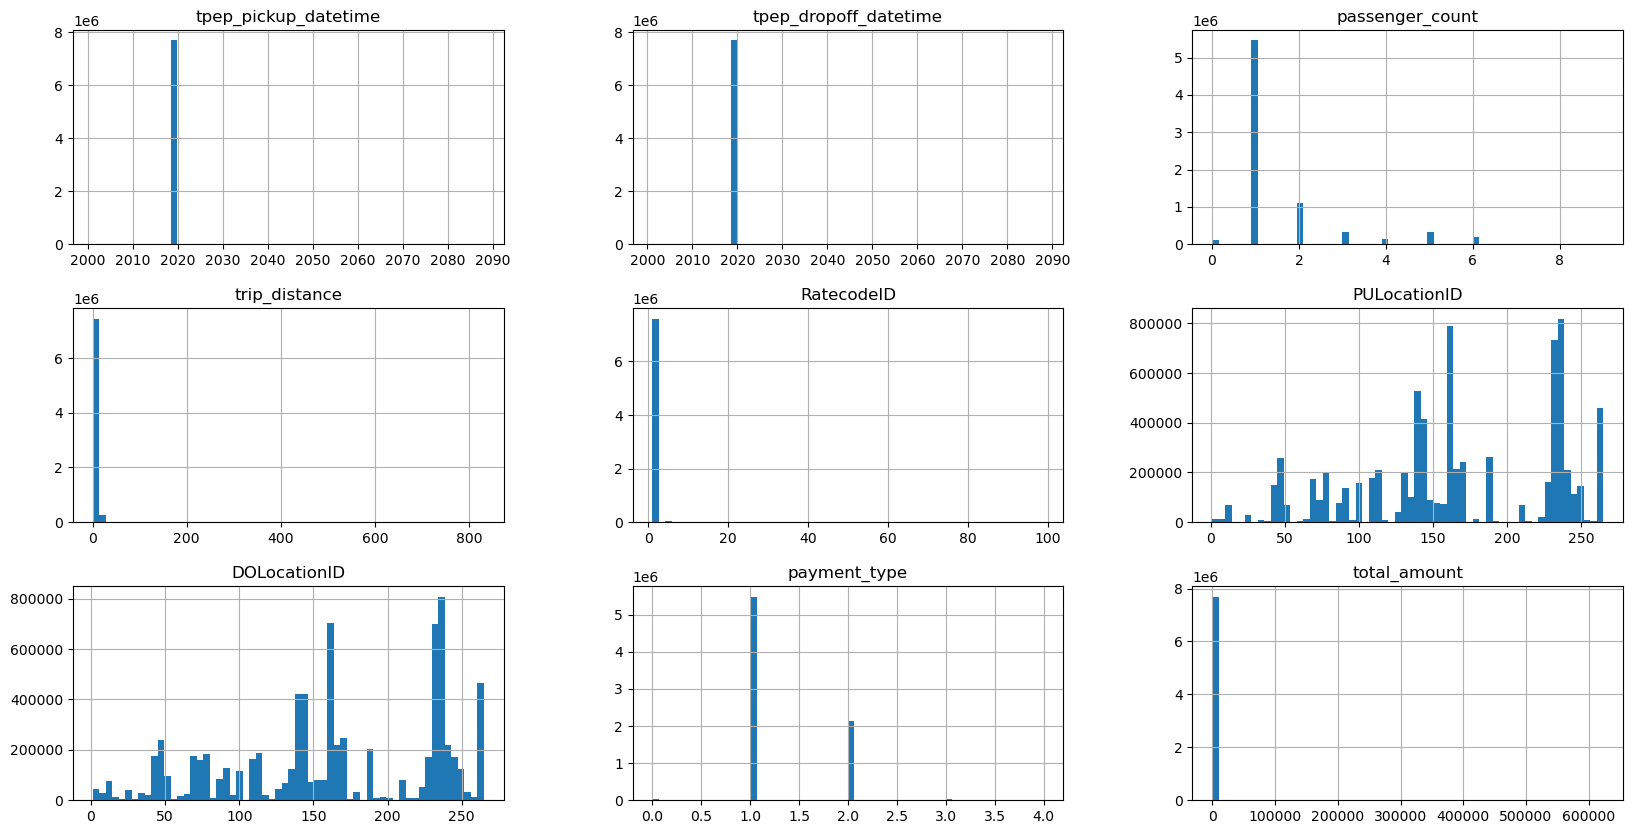

In [8]:
taxi_data.hist(figsize = (20,10), bins = 60)

In [9]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

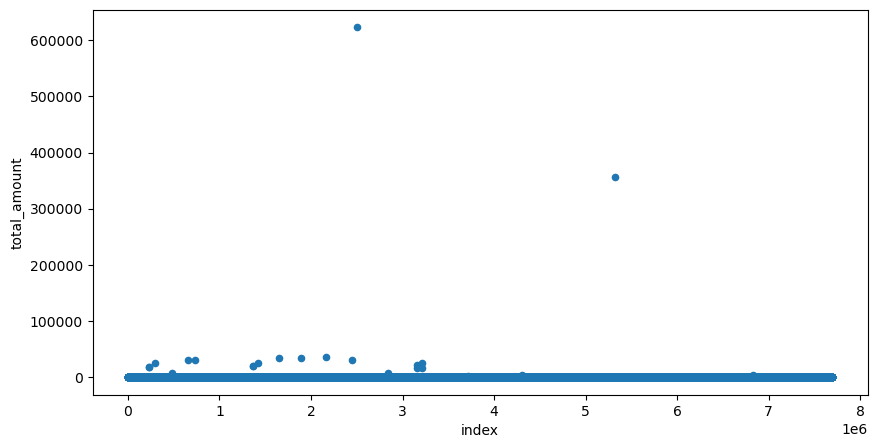

In [10]:
taxi_data.reset_index().plot(kind = 'scatter',y = 'total_amount', x = 'index', figsize = (10,5))

<Axes: xlabel='index', ylabel='total_amount'>

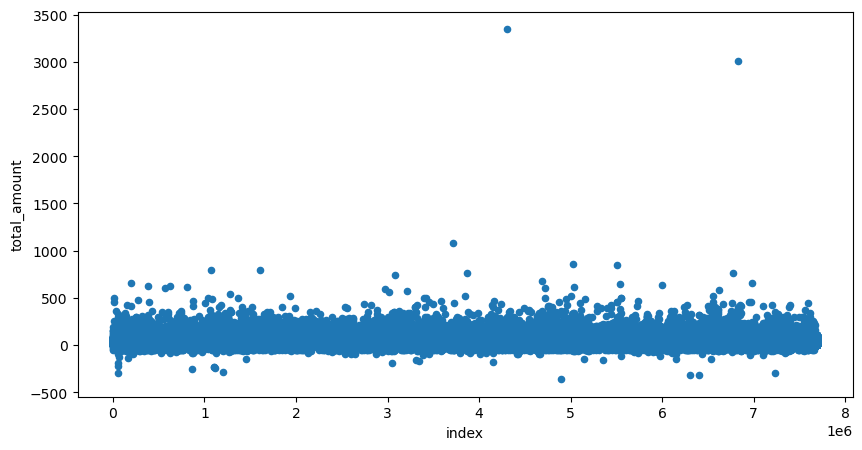

In [11]:
taxi_data[taxi_data['total_amount']<5000].reset_index().plot(kind = 'scatter',y = 'total_amount', x = 'index', figsize = (10,5))

Two things to deal with: negative values and very high values. Let's first look at negative values.

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

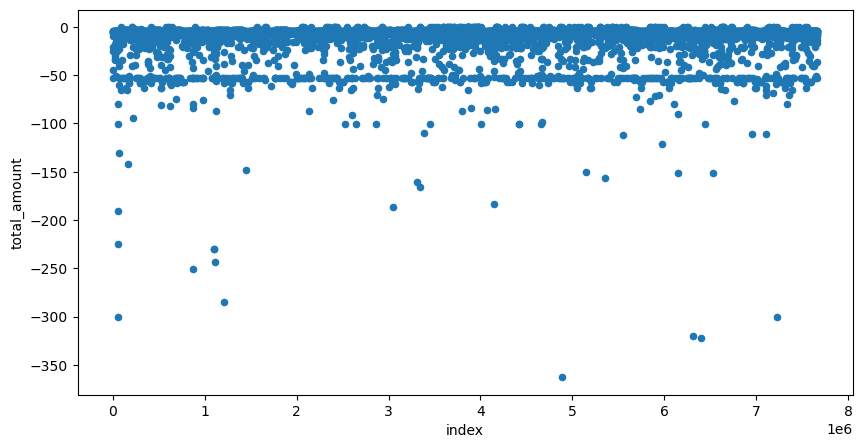

In [12]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind = 'scatter',y = 'total_amount', x = 'index', figsize = (10,5))

In [13]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [14]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

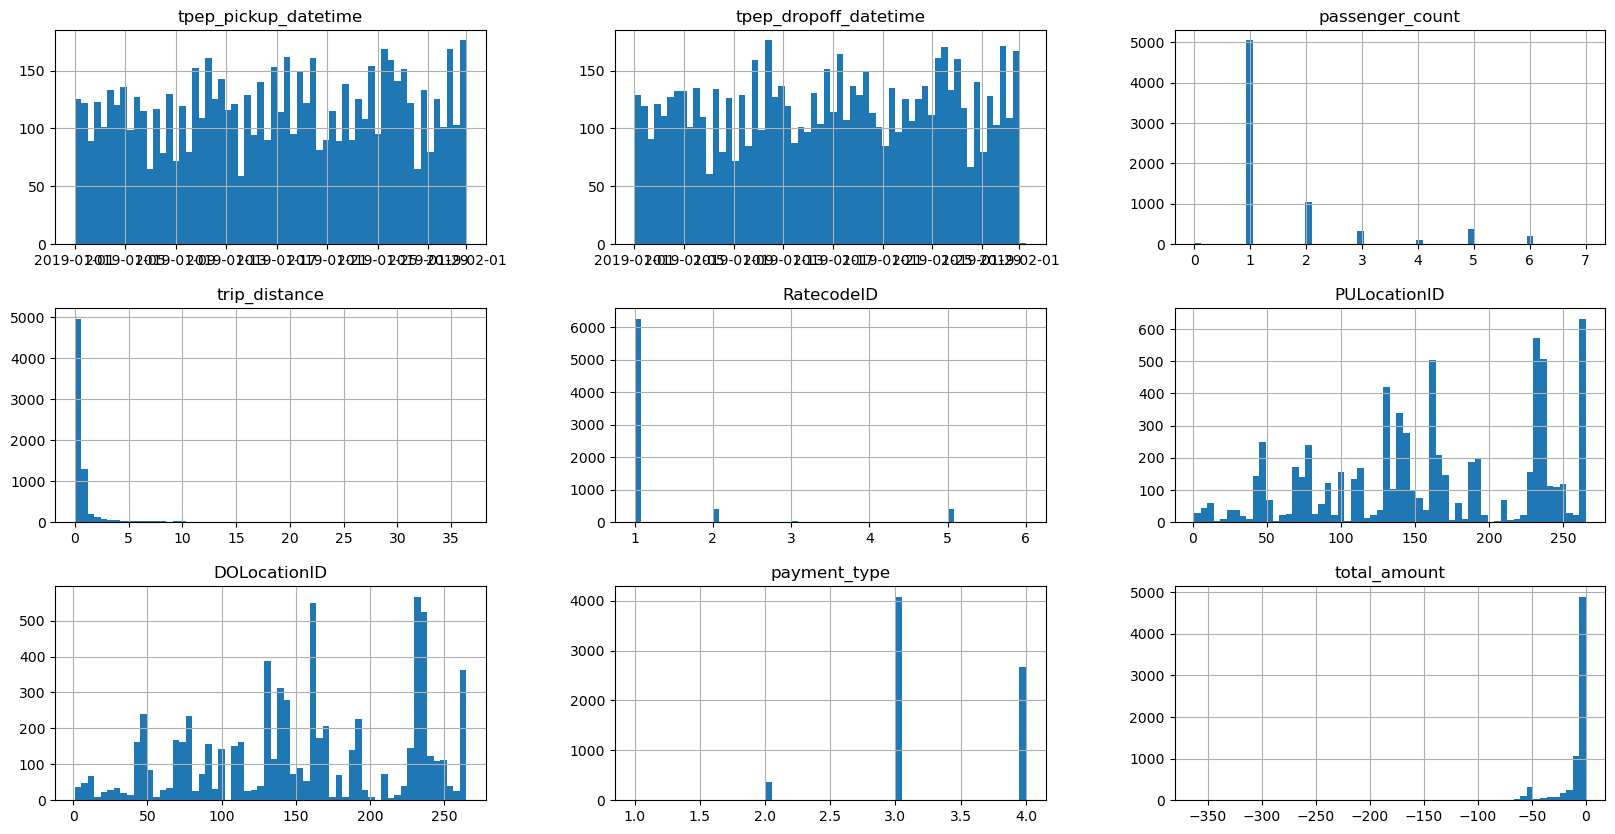

In [15]:
taxi_data[taxi_data['total_amount']<0].hist(figsize=(20,10), bins=60)

In [16]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

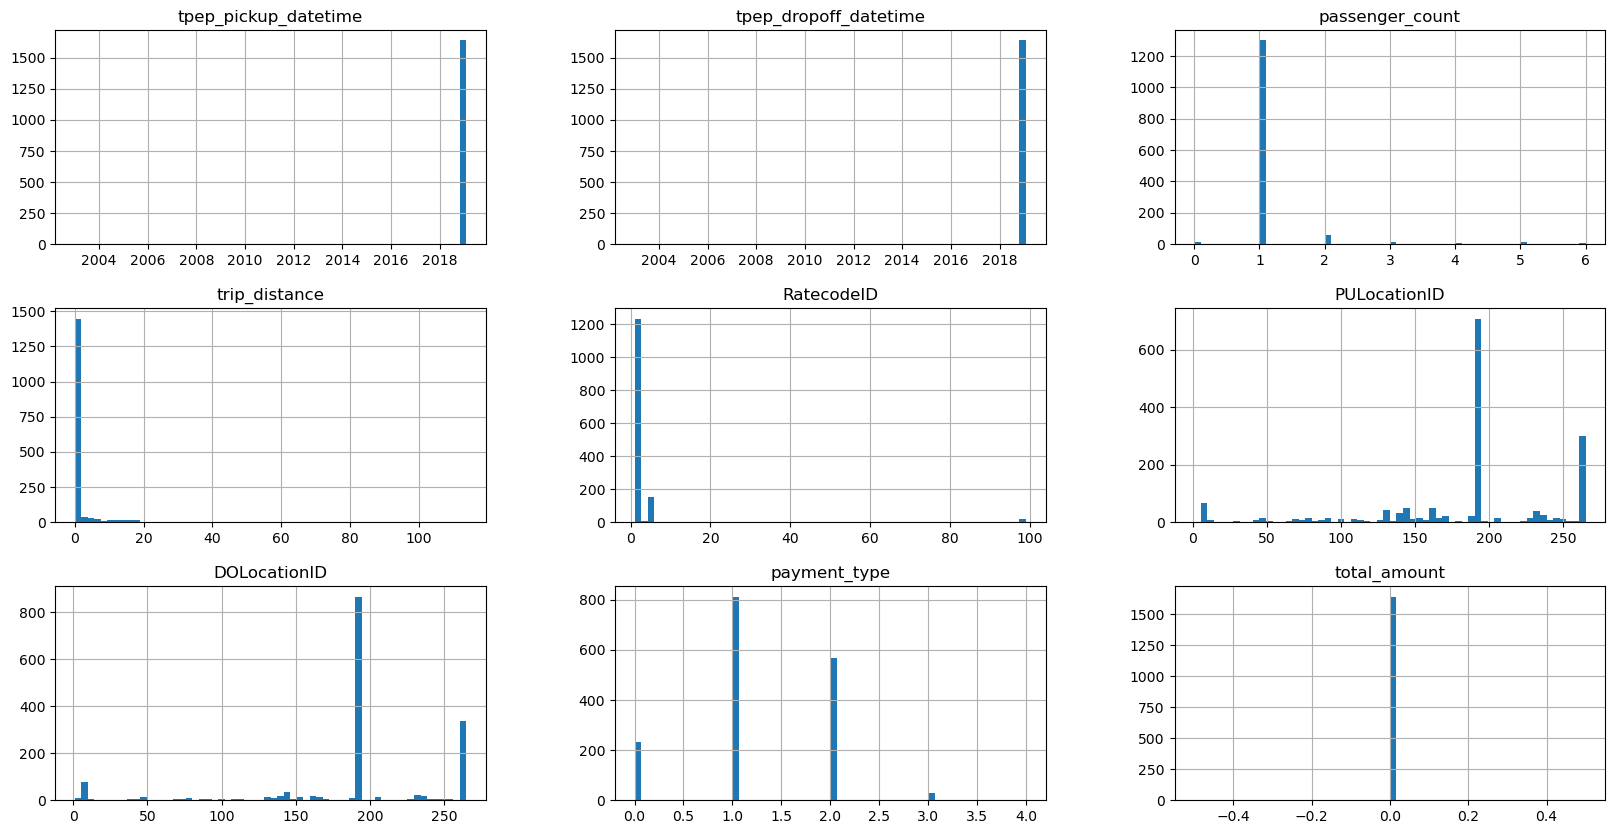

In [17]:
taxi_data[taxi_data['total_amount']==0].hist(figsize=(20,10), bins=60)

In [18]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

We can safely get rid of the negative values. What about the very high values?

<Axes: xlabel='index', ylabel='total_amount'>

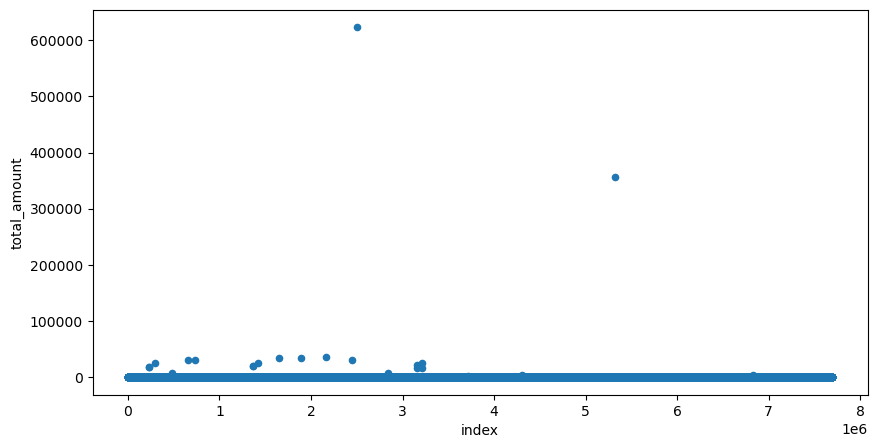

In [19]:
taxi_data.reset_index().plot(kind = 'scatter',y = 'total_amount', x = 'index', figsize = (10,5))

In [20]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [21]:
taxi_data['total_amount'].mean()

15.810651344610214

We can agree to cut from $200 level.

# 3. Data cleaning  <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [22]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>0)&(taxi_data['total_amount']<=200)]

In [23]:
print(taxi_data.shape)
print(taxi_data_filtered.shape)

(7696617, 9)
(7686681, 9)


In [24]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28441
trip_distance                0
RatecodeID               28441
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [25]:
taxi_data_filtered[taxi_data_filtered.isna().any(axis=1)]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
7667945,2019-01-01 00:38:45,2019-01-01 00:54:11,NaN,2.21,NaN,161,263,0,16.30
7667946,2019-01-01 01:56:58,2019-01-01 02:13:14,NaN,3.17,NaN,256,226,0,19.59
7667947,2019-01-01 01:59:06,2019-01-01 02:20:24,NaN,6.31,NaN,140,256,0,34.04
7667951,2019-01-01 04:36:00,2019-01-01 04:58:00,NaN,5.66,NaN,35,97,0,32.50
7667952,2019-01-01 04:36:54,2019-01-01 04:58:27,NaN,8.28,NaN,10,35,0,43.00
...,...,...,...,...,...,...,...,...,...
7696609,2019-01-31 23:10:00,2019-01-31 23:28:00,NaN,9.38,NaN,226,42,0,46.50
7696610,2019-01-31 23:17:00,2019-01-31 23:39:00,NaN,6.73,NaN,136,51,0,39.50
7696611,2019-01-31 23:14:00,2019-01-31 23:29:00,NaN,5.45,NaN,41,136,0,32.50
7696613,2019-01-31 23:28:00,2019-01-31 23:50:50,NaN,12.43,NaN,48,213,0,54.60


In [26]:
taxi_data_filtered.dropna(inplace=True)

C:\Users\Alfej\AppData\Local\Temp\ipykernel_20744\3386940804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data_filtered.dropna(inplace=True)


In [27]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

# 4. Data preparation  <a id='data_preparation'></a>
[Back to top](#table_of_contents)


In [28]:
taxi_data_prepared =  taxi_data_filtered.copy()

In [30]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [31]:
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [32]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object